# Homework 8 Monte-Carlo Simulations

#### Name: Aarya Vakharia
#### Github Id: vakharia-aarya
#### USC Id: 4053556880

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn Dependencies
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.cluster import KMeans, SpectralClustering

# Imb-learn Dependencies
from imblearn.pipeline import Pipeline as imbpipline

In [56]:
import warnings
warnings.filterwarnings('ignore')

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

**(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.**

In [57]:
# read data file and display
column_names = ['ID','Diagnosis'] + [x for x in range(1,31)]
df = pd.read_csv('../Data/wdbc.data',names= column_names)

df

,ID,Diagnosis,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [58]:
# Split data into predictors and labels
X = df.iloc[:,2:]
y = df.iloc[:,1:2]

In [59]:
# Encoding the labels to binary values
y['Diagnosis'] = np.where(y['Diagnosis'] == 'B',0,1)

**i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.**

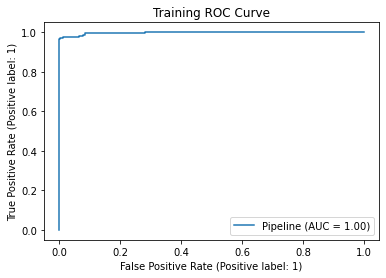

Confusion Matrix for Train: 
[[283   2]
 [  5 165]]


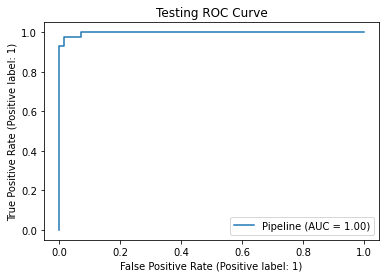

Confusion Matrix for Testing: 
[[71  1]
 [ 1 41]]


In [60]:
# Monte-Carlo for supervised learning 
accuracy, precision, recall, f1, AUC = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(30):
    # Split into train-test
    X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),stratify=y,test_size=0.2, 
                                                     random_state=np.random.randint(1,i+5*300))
    
    # declaring parameters for Cross-Validation
    scaler = StandardScaler()
    clf_svc = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    pipeline =  imbpipline(steps=[['scaler',scaler],['classifier',clf_svc]])
    cv = StratifiedKFold(n_splits=5,shuffle=True)
    
    # CV parameter
    parameters = {'classifier__C': np.logspace(-3,6,10)}
    
    # Cross-validation
    grid =  GridSearchCV(estimator=pipeline,param_grid=parameters,cv = cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train,y_train)
    
    # Calculating various scoring metrices for train and test sets
    y_pred_train = grid.predict(X_train)
    y_pred_test = grid.predict(X_test)
    
    # Accuracy
    accuracy.loc[i,'Train'] = grid.best_score_
    accuracy.loc[i,'Test'] = accuracy_score(y_test,y_pred_test)
    
    # Precision
    precision.loc[i,'Train'] = precision_score(y_train,y_pred_train)
    precision.loc[i,'Test'] = precision_score(y_test,y_pred_test)
    
    # Recall
    recall.loc[i,'Train'] = recall_score(y_train,y_pred_train)
    recall.loc[i,'Test'] = recall_score(y_test,y_pred_test)
    
    # F1 Score
    f1.loc[i,'Train'] = f1_score(y_train,y_pred_train)
    f1.loc[i,'Test'] = f1_score(y_test,y_pred_test)
    
    # AUC
    AUC.loc[i,'Train'] = roc_auc_score(y_train,y_pred_train)
    AUC.loc[i,'Test'] = roc_auc_score(y_test,y_pred_test)
        
    # Reporting the ROC and Confusion Matrix of one of the simulation
    if i == 24:
        # Training Curve
        RocCurveDisplay.from_estimator(grid.best_estimator_, X_train,y_train)
        plt.title("Training ROC Curve")
        plt.show()
        
        print(f"Confusion Matrix for Train: \n{confusion_matrix(y_train,y_pred_train)}")
        
        # Testing Curve
        RocCurveDisplay.from_estimator(grid.best_estimator_, X_test,y_test)
        plt.title("Testing ROC Curve")
        plt.show()
        
        print(f"Confusion Matrix for Testing: \n{confusion_matrix(y_test,y_pred_test)}")

In [61]:
# Reporting The means of each metric

print(f"The Mean Accuracy for Train is: {accuracy['Train'].mean()} and Test is: {accuracy['Test'].mean()}\n")

print(f"The Mean Precision for Train is: {precision['Train'].mean()} and Test is: {precision['Test'].mean()}\n")

print(f"The Mean Recall for Train is: {recall['Train'].mean()} and Test is: {recall['Test'].mean()}\n")

print(f"The Mean F1-Score for Train is: {f1['Train'].mean()} and Test is: {f1['Test'].mean()}\n")

print(f"The Mean AUC for Train is: {AUC['Train'].mean()} and Test is: {AUC['Test'].mean()}\n")

The Mean Accuracy for Train is: 0.9740659340659341 and Test is: 0.9713450292397657

The Mean Precision for Train is: 0.9904197653640231 and Test is: 0.9704981738512157

The Mean Recall for Train is: 0.9715686274509798 and Test is: 0.9523809523809521

The Mean F1-Score for Train is: 0.9808921164022493 and Test is: 0.9607956737652713

The Mean AUC for Train is: 0.9829772961816308 and Test is: 0.9673941798941799



**ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.**

>**A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.**

>**B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training
and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.**

In [62]:
# Function to split data into labled and unlabled data

def lable_unlable_split(X,y):
    
    new_df = pd.concat([X,y], axis=1)
    
    # Get value of +ve and -ve classes
    pos_data = new_df.loc[new_df['Diagnosis'] == 1]
    neg_data = new_df.loc[new_df['Diagnosis'] == 0]
    
    # Split data into labeled and unlabeled data for each class
    pos_labled = pos_data.sample(frac = 0.5)
    pos_unlabled = pos_data.drop(pos_labled.index)
    
    neg_labled = neg_data.sample(frac = 0.5)
    neg_unlabled = neg_data.drop(neg_labled.index)
    
    # Combine the labled and unlabled data
    lable = pd.concat([pos_labled,neg_labled], ignore_index=True) 
    unlable = pd.concat([pos_unlabled,neg_unlabled],ignore_index=True).drop('Diagnosis',axis=1)
    
    return lable, unlable

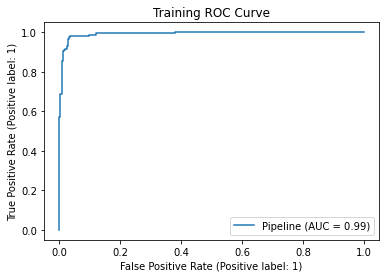

Confusion Matrix for Train: 
[[277   8]
 [  7 163]]


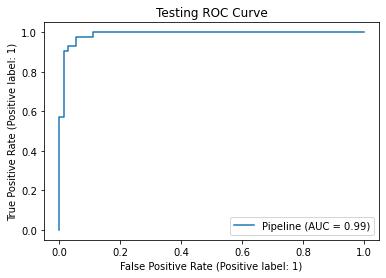

Confusion Matrix for Testing: 
[[70  2]
 [ 4 38]]


In [63]:
# Monte-Carlo simulation for Semi-Supervised learning 
accuracy, precision, recall, f1, AUC = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(30):
    
    # Split the data into train and test
    X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),stratify=y,test_size=0.2, 
                                                     random_state=np.random.randint(1,i+5*300))
    
    # Convert data into dataframe
    X_train = pd.DataFrame.from_records(X_train, columns = [x for x in range(1,31)])
    y_train = pd.DataFrame(y_train,columns=['Diagnosis'])
    
    # Split training data into labled and unlabled data
    train_labled,train_unlabled = lable_unlable_split(X_train,y_train)
        
    # Train a SVC with labled data
    scaler = StandardScaler()
    clf = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    pipeline = imbpipline(steps=[['scaler',StandardScaler()],['classifier',clf]])
    
    parameters = {'classifier__C': np.logspace(-3,6,10)}
    cv = StratifiedKFold(n_splits=5, shuffle=True)

    # Cross Validation
    grid = GridSearchCV(estimator=pipeline,param_grid=parameters,cv =cv,n_jobs=-1, scoring='accuracy')
    
    while len(train_unlabled) > 0:
        
        grid.fit(train_labled.iloc[:,:-1],train_labled.iloc[:,-1:].values.ravel())
        
        # Get farthest point from margin
        confidenc_scores = grid.decision_function(train_unlabled)
        farthest_datapoint = confidenc_scores.max()
        farthest_datapoint_index  = np.where(confidenc_scores == farthest_datapoint)[0][0]

        # Predict lable of farhtest datapoint
        new_row = train_unlabled.filter([farthest_datapoint_index],axis=0)
        y_pred = grid.predict(new_row)
        
        # Add datapoint to the labled datset
        new_row['Diagnosis'] = y_pred
        train_labled.append(new_row)
        train_unlabled = train_unlabled.drop(farthest_datapoint_index).reset_index(drop=True)
    
    # Calculating various scoring metrices for train and test sets
    y_pred_train = grid.predict(X_train)
    y_pred_test = grid.predict(X_test)
    
    # Accuracy
    accuracy.loc[i,'Train'] = grid.best_score_
    accuracy.loc[i,'Test'] = accuracy_score(y_test,y_pred_test)
    
    # Precision
    precision.loc[i,'Train'] = precision_score(y_train,y_pred_train)
    precision.loc[i,'Test'] = precision_score(y_test,y_pred_test)
    
    # Recall
    recall.loc[i,'Train'] = recall_score(y_train,y_pred_train)
    recall.loc[i,'Test'] = recall_score(y_test,y_pred_test)
    
    # F1 Score
    f1.loc[i,'Train'] = f1_score(y_train,y_pred_train)
    f1.loc[i,'Test'] = f1_score(y_test,y_pred_test)
    
    # AUC
    AUC.loc[i,'Train'] = roc_auc_score(y_train,y_pred_train)
    AUC.loc[i,'Test'] = roc_auc_score(y_test,y_pred_test)
   
    if i == 24:
        # Training Curve
        RocCurveDisplay.from_estimator(grid.best_estimator_, X_train,y_train)
        plt.title("Training ROC Curve")
        plt.show()
        
        print(f"Confusion Matrix for Train: \n{confusion_matrix(y_train,y_pred_train)}")
        
        # Testing Curve
        RocCurveDisplay.from_estimator(grid.best_estimator_, X_test,y_test)
        plt.title("Testing ROC Curve")
        plt.show()
        
        print(f"Confusion Matrix for Testing: \n{confusion_matrix(y_test,y_pred_test)}")       

In [64]:
# Reporting The means of each metric

print(f"The Mean Accuracy for Train is: {accuracy['Train'].mean()} and Test is: {accuracy['Test'].mean()}\n")

print(f"The Mean Precision for Train is: {precision['Train'].mean()} and Test is: {precision['Test'].mean()}\n")

print(f"The Mean Recall for Train is: {recall['Train'].mean()} and Test is: {recall['Test'].mean()}\n")

print(f"The Mean F1-Score for Train is: {f1['Train'].mean()} and Test is: {f1['Test'].mean()}\n")

print(f"The Mean AUC for Train is: {AUC['Train'].mean()} and Test is: {AUC['Test'].mean()}\n")

The Mean Accuracy for Train is: 0.9731143317230272 and Test is: 0.9625730994152042

The Mean Precision for Train is: 0.9784693765179249 and Test is: 0.9622397256903005

The Mean Recall for Train is: 0.9564705882352939 and Test is: 0.9365079365079362

The Mean F1-Score for Train is: 0.9671574011691 and Test is: 0.9485315420066043

The Mean AUC for Train is: 0.9718610251117991 and Test is: 0.9571428571428573



**iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.**

> **A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?**

>One of the easiest ways to try and find the global minimum is to run the k-means algorithm multiple times with random starting points each time. This ensures that the algorithm is not stuck in the local minimum. 

>**B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.**

>**C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.**

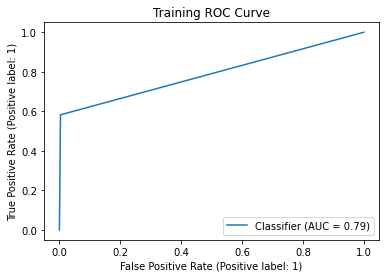

Confusion Matrix for Train: 
[[284   1]
 [ 71  99]]


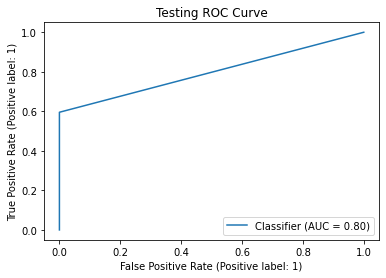

Confusion Matrix for Testing: 
[[72  0]
 [17 25]]


In [65]:
accuracy, precision, recall, f1, AUC = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(30):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=np.random.randint(1,i+1*42))
    
    # Train Kmeans 
    clf = KMeans(n_clusters=2).fit(X_train)
    
    # Get Distances to clusters and lables of 
    distances_to_clusters = pd.DataFrame(clf.transform(X_train), columns=['Dist to Cluster 0','Dist to Cluster 1'], index= X_train.index)
    
    # Calculate closest 30 points to each cluster
    closest_to_cluster_0 = distances_to_clusters['Dist to Cluster 0'].sort_values().head(30)
    closest_to_cluster_1 = distances_to_clusters['Dist to Cluster 1'].sort_values().head(30)
    
    # Using majority poll to find the lable for each cluster
    y_pred_clust_0 = y_train.loc[closest_to_cluster_0.index].value_counts().idxmax()
    y_pred_clust_1 = y_train.loc[closest_to_cluster_1.index].value_counts().idxmax()
    
    y_pred_train = pd.DataFrame()
    y_pred_train['Predicted Labels'] = np.where(clf.labels_ == 0, y_pred_clust_0, y_pred_clust_1)
    
    
    # Make Predictions on test data
    test_distances_to_clusters = clf.transform(X_test)    
    y_pred_test = []
    
    for point in range(len(X_test)):
        closest_cluster = np.argmin(test_distances_to_clusters[point])
        
        if closest_cluster == 0:
            y_pred_test.append(y_pred_clust_0)
        else:
            y_pred_test.append(y_pred_clust_1)
    
    y_pred_test = np.array(y_pred_test)
    
    # Accuracy
    accuracy.loc[i,'Train'] = accuracy_score(y_train,y_pred_train)
    accuracy.loc[i,'Test'] = accuracy_score(y_test,y_pred_test)

    # Precision
    precision.loc[i,'Train'] = precision_score(y_train,y_pred_train)
    precision.loc[i,'Test'] = precision_score(y_test,y_pred_test)
    
    # Recall
    recall.loc[i,'Train'] = recall_score(y_train,y_pred_train)
    recall.loc[i,'Test'] = recall_score(y_test,y_pred_test)
    
    # F1 Score
    f1.loc[i,'Train'] = f1_score(y_train,y_pred_train)
    f1.loc[i,'Test'] = f1_score(y_test,y_pred_test)
    
    # AUC
    AUC.loc[i,'Train'] = roc_auc_score(y_train,y_pred_train)
    AUC.loc[i,'Test'] = roc_auc_score(y_test,y_pred_test)
    
    if i == 24:
        # Training Curve
        RocCurveDisplay.from_predictions(y_train,y_pred_train)
        plt.title("Training ROC Curve")
        plt.show()
        
        print(f"Confusion Matrix for Train: \n{confusion_matrix(y_train,y_pred_train)}")
        
        # Testing Curve
        RocCurveDisplay.from_predictions(y_test,y_pred_test)
        plt.title("Testing ROC Curve")
        plt.show()
        
        print(f"Confusion Matrix for Testing: \n{confusion_matrix(y_test,y_pred_test)}")     

In [66]:
# Reporting The means of each metric

print(f"The Mean Accuracy for Train is: {accuracy['Train'].mean()} and Test is: {accuracy['Test'].mean()}\n")

print(f"The Mean Precision for Train is: {precision['Train'].mean()} and Test is: {precision['Test'].mean()}\n")

print(f"The Mean Recall for Train is: {recall['Train'].mean()} and Test is: {recall['Test'].mean()}\n")

print(f"The Mean F1-Score for Train is: {f1['Train'].mean()} and Test is: {f1['Test'].mean()}\n")

print(f"The Mean AUC for Train is: {AUC['Train'].mean()} and Test is: {AUC['Test'].mean()}\n")

The Mean Accuracy for Train is: 0.8479120879120882 and Test is: 0.8596491228070174

The Mean Precision for Train is: 0.9925724128280741 and Test is: 0.9917749929865243

The Mean Recall for Train is: 0.5974509803921567 and Test is: 0.6246031746031745

The Mean F1-Score for Train is: 0.7455419797979721 and Test is: 0.7649396944889387

The Mean AUC for Train is: 0.7973804609563121 and Test is: 0.8106812169312169



**iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non convex clusters . Instead, use fit − predict method.**

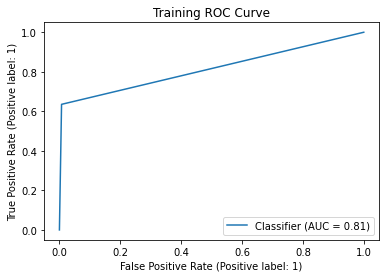

Confusion Matrix for Train: 
[[283   2]
 [ 62 108]]


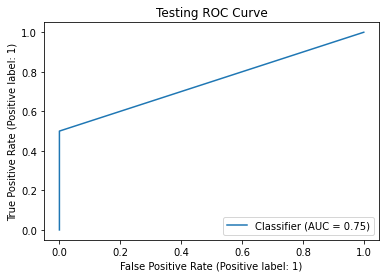

Confusion Matrix for Testing: 
[[72  0]
 [21 21]]


In [67]:
# Monte-Carlo simulations for Spectral Clustering 
accuracy, precision, recall, f1, AUC = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

for i in range(30):
    
    # Split data into train-test sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y, 
                                                     random_state= np.random.randint(1,i+1*300))
                                                    
    
    # Normalize The Data
    X_train_stand = MinMaxScaler().fit_transform(X_train)
    
    # Train the SpectralClustering and get predicted lables 
    predicted_labels = SpectralClustering(n_clusters=2,affinity='rbf',gamma=1.0).fit_predict(X_train_stand)
    predicted_labels = pd.DataFrame(predicted_labels,index=X_train.index, columns=['Predicted Cluster'])
    
    # Seperate according to clusters
    points_in_clust_0 = predicted_labels[predicted_labels['Predicted Cluster'] == 0]
    points_in_clust_1 = predicted_labels[predicted_labels['Predicted Cluster'] == 1]

    # Do majority polling
    majority_class_clust_0 = y_train.loc[points_in_clust_0.index].value_counts().idxmax()
    majority_class_clust_1 = y_train.loc[points_in_clust_1.index].value_counts().idxmax()
    
    # For all datpoints assign the majority class
    y_pred_train = np.where(predicted_labels['Predicted Cluster'] == 0, majority_class_clust_0, majority_class_clust_1)
 
    
    # Test on test data
    X_test_stand = MinMaxScaler().fit_transform(X_test)
    y_pred_test = SpectralClustering(n_clusters=2, affinity='rbf',gamma=1.0).fit_predict(X_test_stand)
    
    y_pred_test = np.where(y_pred_test == 0,majority_class_clust_0,majority_class_clust_1 )
    
    # Calculating Various Metrices for Clustering
    # Accuracy
    accuracy.loc[i,'Train'] = accuracy_score(y_train,y_pred_train)
    accuracy.loc[i,'Test'] = accuracy_score(y_test,y_pred_test)

    # Precision
    precision.loc[i,'Train'] = precision_score(y_train,y_pred_train)
    precision.loc[i,'Test'] = precision_score(y_test,y_pred_test)
    
    # Recall
    recall.loc[i,'Train'] = recall_score(y_train,y_pred_train)
    recall.loc[i,'Test'] = recall_score(y_test,y_pred_test)
    
    # F1 Score
    f1.loc[i,'Train'] = f1_score(y_train,y_pred_train)
    f1.loc[i,'Test'] = f1_score(y_test,y_pred_test)
    
    # AUC
    AUC.loc[i,'Train'] = roc_auc_score(y_train,y_pred_train)
    AUC.loc[i,'Test'] = roc_auc_score(y_test,y_pred_test)
    
    # Plot ROC curves for 1 iteration
    if i == 24:
        # Training Curve
        RocCurveDisplay.from_predictions(y_train,y_pred_train)
        plt.title("Training ROC Curve")
        plt.show()
        
        print(f"Confusion Matrix for Train: \n{confusion_matrix(y_train,y_pred_train)}")
        
        # Testing Curve
        RocCurveDisplay.from_predictions(y_test,y_pred_test)
        plt.title("Testing ROC Curve")
        plt.show()
        
        print(f"Confusion Matrix for Testing: \n{confusion_matrix(y_test,y_pred_test)}")     


In [68]:
# Reporting The means of each metric

print(f"The Mean Accuracy for Train is: {accuracy['Train'].mean()} and Test is: {accuracy['Test'].mean()}\n")

print(f"The Mean Precision for Train is: {precision['Train'].mean()} and Test is: {precision['Test'].mean()}\n")

print(f"The Mean Recall for Train is: {recall['Train'].mean()} and Test is: {recall['Test'].mean()}\n")

print(f"The Mean F1-Score for Train is: {f1['Train'].mean()} and Test is: {f1['Test'].mean()}\n")

print(f"The Mean AUC for Train is: {AUC['Train'].mean()} and Test is: {AUC['Test'].mean()}\n")

The Mean Accuracy for Train is: 0.8553846153846156 and Test is: 0.6347953216374268

The Mean Precision for Train is: 0.9810242311202776 and Test is: 0.775129884160654

The Mean Recall for Train is: 0.6252941176470587 and Test is: 0.4714285714285715

The Mean F1-Score for Train is: 0.762411093983664 and Test is: 0.5295121293473151

The Mean AUC for Train is: 0.8089628482972135 and Test is: 0.6007605820105819



**v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods**

### Results

Yes, according to our above results we can conclude that the best performing algorithm is the supervised SVC giving us an accuracy of 97% on the testing data. It is closely followed by the semi-supervised algorithm with an accuracy of 96%. 

Coming to the unsupervised algorithms, K-Means performs better than Specteral Clustering with an accuracy of 85% whilst the latter performs poorly with an accuracy of 63% on testing data.

The results line up with the expected performances. 

### 2. Active Learning Using Support Vector Machines

>**(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.**

In [69]:
# Load Bank Authentication Data
column_names = ['Variance','Skewness','Curtosis','Entropy','Class']
df = pd.read_csv('../Data/data_banknote_authentication.txt', names=column_names)

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

**(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.**

>**i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.**

In [71]:
# Monte-Carlo Simulation for Passive learning

test_error_passive = pd.DataFrame()
for i in range(50):
    
    # Perform Train-test split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=472, stratify=y)
    
    # Get 10 random samples from training set
    train_pool_x = pd.DataFrame()
    
    clf = LinearSVC(penalty='l1',dual=False, max_iter=10000)
    cv = StratifiedKFold(n_splits=5,shuffle=True)
    parameters = {'C': np.logspace(-3,6,10)}
    
    svm_no = 0
    while len(X_train) > 0:
        svm_no += 1
        sample = X_train.sample(10)
        train_pool_x = pd.concat([train_pool_x,sample])
        train_pool_y = y_train.loc[train_pool_x.index]
        
        X_train.drop(sample.index, axis=0, inplace=True)
        
        # Train the SVM on selected pool of datapoints
        grid = GridSearchCV(estimator=clf,param_grid=parameters,cv = cv, scoring='accuracy')
        grid.fit(train_pool_x,train_pool_y.values.ravel())
        
        test_error_passive.loc[i,'SVM'+ str(svm_no)] = 1 - grid.score(X_test,y_test)
        

In [72]:
print("Average Test Error for Passive Learning: \n")
pd.DataFrame(test_error_passive.mean(axis=1)).T

Average Test Error for Passive Learning: 



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.011394,0.015819,0.015089,0.014171,0.022952,0.014548,0.01935,0.014101,0.01476,0.008875,...,0.015207,0.015301,0.015725,0.013677,0.017114,0.017985,0.014972,0.018362,0.015066,0.028508


**ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.You have implemented active learning.**

In [73]:
# Monte-Carlo Simulation for Active learning

test_error_active = pd.DataFrame()
for i in range(50):
    
    # Perform Train-test split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=472, stratify=y)
    
    # Get 10 random samples from training set
    train_pool_x = pd.DataFrame()
    
    clf = LinearSVC(penalty='l1',dual=False, max_iter=10000)
    cv = StratifiedKFold(n_splits=5,shuffle=True)
    parameters = {'C': np.logspace(-3,6,10)}
    print(f"Iter No.: {i}")
    
    svm_no = 0
    while len(X_train) > 0:
        svm_no += 1
        if len(train_pool_x) <= 0:
            
            sample = X_train.sample(10)
            
            while len(y_train['Class'].loc[sample.index].value_counts()) != 2:
                sample = X_train.sample(10)
                    
        else:
            closest_points = pd.DataFrame(grid.decision_function(X_train), index=X_train.index).nsmallest(10,columns=0)
            sample = X_train.loc[closest_points.index]
            
        train_pool_x = pd.concat([train_pool_x,sample])
        train_pool_y = y_train.loc[train_pool_x.index]

        X_train.drop(sample.index, axis=0, inplace=True)
        
        # Train the SVM on selected pool of datapoints
        grid = GridSearchCV(estimator=clf,param_grid=parameters,cv = cv, scoring='accuracy')
        grid.fit(train_pool_x,train_pool_y.values.ravel())
        
        # sample = Get 10 closest from grid
        test_error_active.loc[i,'SVM'+ str(svm_no)] = 1 - grid.score(X_test,y_test)

Iter No.: 0
Iter No.: 1
Iter No.: 2
Iter No.: 3
Iter No.: 4
Iter No.: 5
Iter No.: 6
Iter No.: 7
Iter No.: 8
Iter No.: 9
Iter No.: 10
Iter No.: 11
Iter No.: 12
Iter No.: 13
Iter No.: 14
Iter No.: 15
Iter No.: 16
Iter No.: 17
Iter No.: 18
Iter No.: 19
Iter No.: 20
Iter No.: 21
Iter No.: 22
Iter No.: 23
Iter No.: 24
Iter No.: 25
Iter No.: 26
Iter No.: 27
Iter No.: 28
Iter No.: 29
Iter No.: 30
Iter No.: 31
Iter No.: 32
Iter No.: 33
Iter No.: 34
Iter No.: 35
Iter No.: 36
Iter No.: 37
Iter No.: 38
Iter No.: 39
Iter No.: 40
Iter No.: 41
Iter No.: 42
Iter No.: 43
Iter No.: 44
Iter No.: 45
Iter No.: 46
Iter No.: 47
Iter No.: 48
Iter No.: 49


In [74]:
print("The Average Test Errors for Active Learning")
pd.DataFrame(test_error_active.mean(axis=1)).T

The Average Test Errors for Active Learning


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.061841,0.053531,0.048282,0.055085,0.100235,0.040019,0.066667,0.058333,0.054143,0.055556,...,0.064313,0.05492,0.081403,0.053178,0.084887,0.021798,0.061276,0.056897,0.025565,0.078978


**(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.**

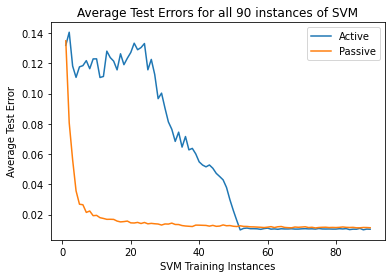

In [77]:
# Plot test errors

x_scale = np.arange(1,91)
plt.plot(x_scale,test_error_active.mean(axis=0))
plt.plot(x_scale,test_error_passive.mean(axis=0))

plt.xlabel('SVM Training Instances')
plt.ylabel('Average Test Error')
plt.legend(['Active','Passive'])
plt.title('Average Test Errors for all 90 instances of SVM')
plt.show()

### References

1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
2. https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
3. https://stackoverflow.com/questions/64375744/does-kmeans-transform-return-the-euclidian-distance-of-each-point-to-its-assigne
4. https://stackoverflow.com/questions/54240144/distance-between-nodes-and-the-centroid-in-a-kmeans-cluster
5. http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
6. http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
7. http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
8. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
9. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
10. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
11. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
12. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
13. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
14. http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
15. https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
16. https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
17. https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html
18. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html